<a href="https://colab.research.google.com/github/avadhani123/Practical-Machine-Learning/blob/master/Assignment2_Experiment3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from collections import Counter
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
keras.__version__

'2.4.0'

**Data Preprocessing**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

**We create a CNN with 2 convolution/max pooling layers (no drop out) to work with our Fashion MNIST dataset. All layers will use the ReLU activation function.**

In [ ]:
#building the network 

In [6]:
model_3a = models.Sequential()
model_3a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Flatten())
model_3a.add(layers.Dense(128, activation='relu'))
model_3a.add(layers.Dense(10, activation='softmax'))

In [7]:
model_3a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
#creating runtime classes 

In [10]:
class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

In [11]:
class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

In [ ]:
#compiling the model

In [12]:
model_3a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#training the model

In [13]:
train_rt = TrainRuntimeCallback()
history = model_3a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))


Epoch 1/20
550/550 [==============================] - 44s 79ms/step - loss: 0.7431 - accuracy: 0.7506 - val_loss: 0.3785 - val_accuracy: 0.8692
Epoch 2/20
550/550 [==============================] - 42s 77ms/step - loss: 0.3574 - accuracy: 0.8728 - val_loss: 0.3086 - val_accuracy: 0.8910
Epoch 3/20
550/550 [==============================] - 42s 77ms/step - loss: 0.3012 - accuracy: 0.8897 - val_loss: 0.3024 - val_accuracy: 0.8918
Epoch 4/20
550/550 [==============================] - 42s 77ms/step - loss: 0.2749 - accuracy: 0.9012 - val_loss: 0.2633 - val_accuracy: 0.9042
Epoch 5/20
550/550 [==============================] - 42s 76ms/step - loss: 0.2438 - accuracy: 0.9128 - val_loss: 0.2752 - val_accuracy: 0.9004
Epoch 6/20
550/550 [==============================] - 43s 77ms/step - loss: 0.2279 - accuracy: 0.9150 - val_loss: 0.2534 - val_accuracy: 0.9088
Epoch 7/20
550/550 [==============================] - 42s 77ms/step - loss: 0.2078 - accuracy: 0.9231 - val_loss: 0.2429 - val_accuracy:

In [ ]:
#training and  time

In [14]:
train_time = train_rt.process_time
train_time # in seconds

851.576519

In [16]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_3a.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 3s 10ms/step - loss: 0.3462 - accuracy: 0.9120


In [17]:
test_time = test_rt.process_time
test_time # in seconds

3.206093

In [ ]:
#accuracy and plotting

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.091691,0.966145,0.279258,0.9162
16,0.080241,0.970709,0.292401,0.9152
17,0.073180,0.972782,0.322978,0.9136
18,0.066813,0.975545,0.318989,0.9144
19,0.059496,0.978509,0.327916,0.9170


In [20]:
results_df3a = history_df.iloc[-1:].copy()
results_df3a.insert(0,'model','CNN (2 layers)') # want the model name to appear first
results_df3a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df3a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df3a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (2 layers),0.059496,0.978509,0.327916,0.917,851.576519,3.206093


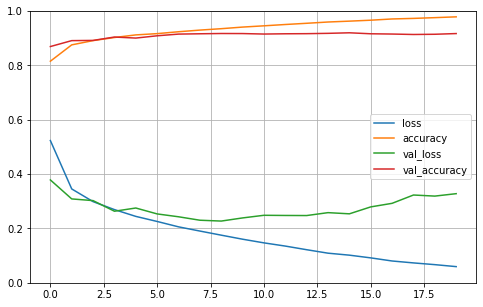

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Experiment  4: CNN with 3 convolution/max pooling layers (no drop out) to work with our Fashion MNIST dataset.**

In [ ]:
#building the network

In [24]:
model_4a = models.Sequential()
model_4a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.Flatten())
model_4a.add(layers.Dense(64, activation='relu'))
model_4a.add(layers.Dense(10, activation='softmax'))

In [25]:
model_4a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
#compile the model

In [26]:
model_4a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#train the model

In [27]:
train_rt = TrainRuntimeCallback()
history = model_4a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_4a.h5'
model_path = os.path.join(save_dir, model_name)
model_4a.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 45s 80ms/step - loss: 0.8770 - accuracy: 0.6818 - val_loss: 0.4037 - val_accuracy: 0.8588
Epoch 2/20
550/550 [==============================] - 45s 81ms/step - loss: 0.4008 - accuracy: 0.8532 - val_loss: 0.3468 - val_accuracy: 0.8802
Epoch 3/20
550/550 [==============================] - 44s 80ms/step - loss: 0.3345 - accuracy: 0.8784 - val_loss: 0.3147 - val_accuracy: 0.8840
Epoch 4/20
550/550 [==============================] - 45s 81ms/step - loss: 0.2991 - accuracy: 0.8917 - val_loss: 0.2858 - val_accuracy: 0.9000
Epoch 5/20
550/550 [==============================] - 44s 81ms/step - loss: 0.2675 - accuracy: 0.9033 - val_loss: 0.2737 - val_accuracy: 0.9002
Epoch 6/20
550/550 [==============================] - 44s 80ms/step - loss: 0.2515 - accuracy: 0.9064 - val_loss: 0.2736 - val_accuracy: 0.8974
Epoch 7/20
550/550 [==============================] - 45s 81ms/step - loss: 0.2332 - accuracy: 0.9151 - val_loss: 0.2458 - val_accuracy:

In [28]:
train_time = train_rt.process_time
train_time 

891.958671

In [29]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_4a.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 3s 10ms/step - loss: 0.3166 - accuracy: 0.9080


In [31]:
test_time = test_rt.process_time
test_time

3.397868

In [ ]:
#accuracy and plotting

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
results_df4a = history_df.iloc[-1:].copy()
results_df4a.insert(0,'model','CNN (3 layers)') 
results_df4a['training time (sec)'] = train_time     
results_df4a['testing time (sec)'] = test_time      
results_df4a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (3 layers),0.059496,0.978509,0.327916,0.917,891.958671,3.397868


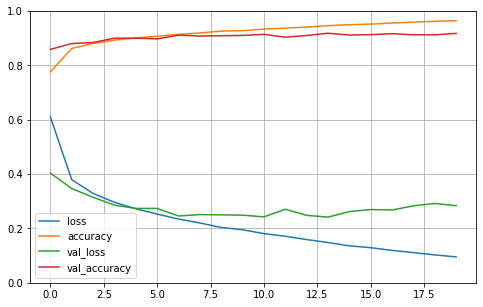

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()